# 01-08 Optimizers: Building a parameterized model

### What is an optimizer?
an alogorithm that can be used to:

- Find minimum values of objective functions
    - f(x) = x^3 + 2x + 5
- Build parameterized models based on data
- Refine allocations to stocks in portfolios

#### how to use an optimizer

1. Provide a function to minimize e.g. [f(x) = x^2 + .5]
2. Provide an initial guess
3. Call the optimizer

X = [ 2.], Y = [ 0.75]
X = [ 2.], Y = [ 0.75]
X = [ 2.00000001], Y = [ 0.75000001]
X = [ 0.99999999], Y = [ 0.75000001]
X = [ 1.5], Y = [ 0.5]
X = [ 1.5], Y = [ 0.5]
X = [ 1.50000001], Y = [ 0.5]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: [ 0.5]
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2
X=[ 1.5], Y=[ 0.5]
X = [ 0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
  2.   2.1  2.2  2.3  2.4  2.5], Y = [ 1.5   1.31  1.14  0.99  0.86  0.75  0.66  0.59  0.54  0.51  0.5   0.51
  0.54  0.59  0.66  0.75  0.86  0.99  1.14  1.31  1.5 ]


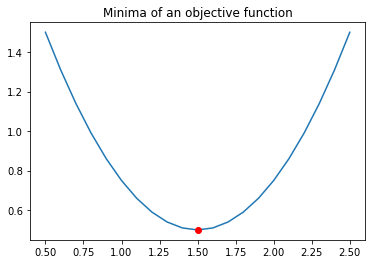

In [1]:
# minimization example, f(x) = (x-1.5)^2 + 0.5
# give initial guess at 2, then looks at values about and below and determines slope
# goes down the slope and continues on until zeros in on 1.5 for x
# variation on this method other than down the slope

""" Minimize an objective function, using SciPy. """
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo
from DataHelper import DataHelper

def f(X):
    Y = (X - 1.5)**2 + 0.5
    print("X = {}, Y = {}".format(X, Y)) # tracing
    return Y

Xguess = 2.0
# f - our function
# Xguess - our guess
# method - the algorithm to use
# disp - print about things it discovers
min_result = spo.minimize(f, Xguess, method='SLSQP', options={'disp': True})

print("X={}, Y={}".format(min_result.x, min_result.fun))

Xplot = np.linspace(0.5, 2.5, 21)
Yplot = f(Xplot)

plt.plot(Xplot, Yplot)
plt.plot(min_result.x, min_result.fun, 'ro')
plt.title("Minima of an objective function")
plt.show()


In [2]:
# Convex problems - easy for minmization functions
# convex if line segment between any two points on the graph of the function lies above the graph

### Building a parameterized model

beta 0.844253818406
alpha 0.000314075169058


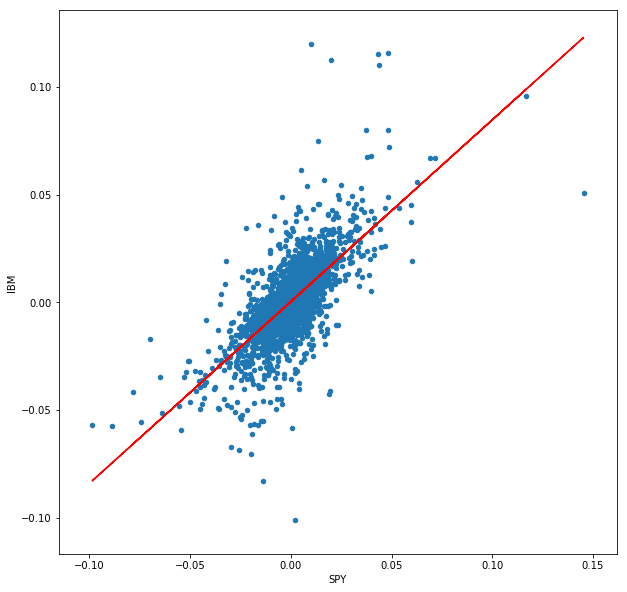

In [27]:
# f(x) = mx + b
# f(x) = C0 (x) + C1 (b)

# linear regression is a minization function with ordinary least squares
data = DataHelper.GetPriceHistory(['IBM'])
dailyAll = DataHelper.compute_daily_returns(data)
beta,alpha = DataHelper.get_alpha_beta(dailyAll["SPY"], dailyAll["IBM"])
print("beta", beta)
print("alpha", alpha)
DataHelper.plot_linereg(dailyAll, "SPY", "IBM")

In [40]:
# Now lets use minimizer to find beta of stock and see if we get same result

lineData = dailyAll[["SPY", "IBM"]].values

def error(line, data):
    return np.sum((data[:,1] - (line[0] * data[:,0] + line[1]))**2)

line = [0,0]

min_result = spo.minimize(error, line, args=(lineData,), method='SLSQP', options={'disp': True})
print (min_result)

# not as accurate, finds local minima becuase of SLSQP

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.412315053165
            Iterations: 4
            Function evaluations: 20
            Gradient evaluations: 4
     fun: 0.41231505316486716
     jac: array([ -3.72529030e-09,   0.00000000e+00,   0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 20
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([  8.44253819e-01,   3.14067719e-04])


Original Line: c0 = 4.0, c1 = 2.0
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 82.9745623833
            Iterations: 5
            Function evaluations: 24
            Gradient evaluations: 5
fitted line: c0 = 4.226411569447781, c1 = 0.9263006837480217


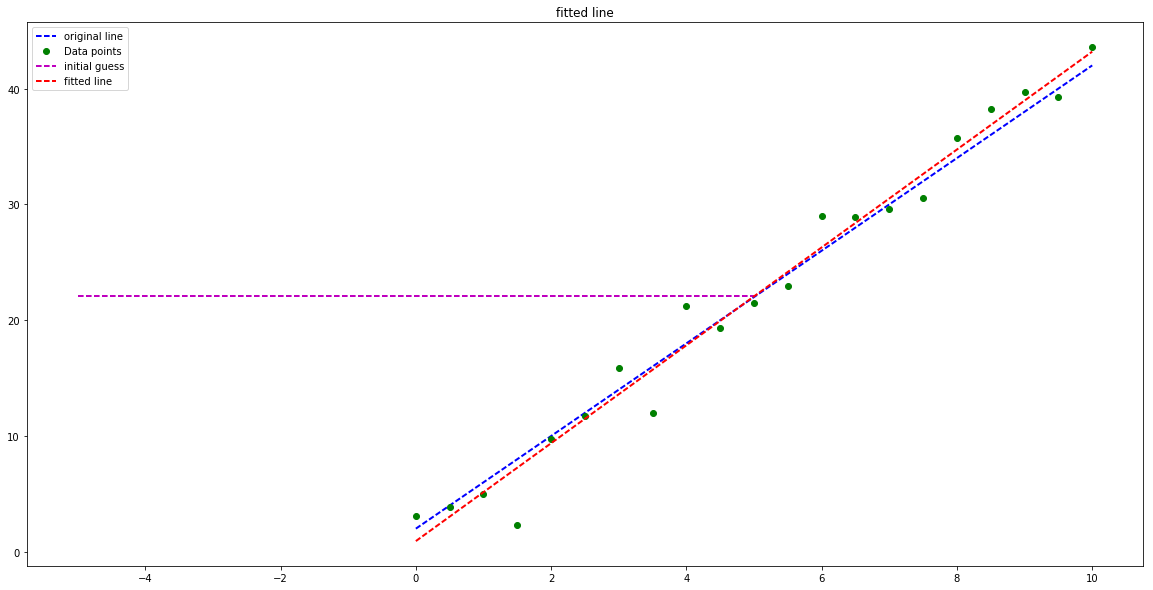

In [48]:
# here is minmizer trying to find original line after adding noise to it

def error(line, data): 
    """ compute error between given line model and observed data 
    parameters 
    ---------- 
    line: tuple/list/array (c0,c1) where c0 = slope, c1 = y_intercept 
    data: 2D array where each row is a point (x,y) 
    returns error as a single real value. 
    """ 
    # Metric: sum of squared y-axis differences 
    err = np.sum((data[:,1] - (line[0] * data[:,0] + line[1]))**2) 
    return err 
 
def fit_line(data, error_func): 
    """fit a line to given data, using a supplied error function. 
    parameters 
    --------- 
    data: 2D array where each row is a point (x0, y) 
    error_func: function that computes the error_between a line and observed data points 
    returns line that minimizes the error_func 
    """ 
    # generate initial guess for line model 
    line_guess = np.float32([0, np.mean(data[:,1])]) # slope = 0, intercept = mean(y value) 

    # plot initial guess (optional) 
    x_ends = np.float32([-5,5]) 
    plt.plot(x_ends, line_guess[0] * x_ends + line_guess[1], 'm--', linewidth=2.0, label="initial guess") 

    # call optimizer to minimize error function 
    result = spo.minimize(error_func, line_guess, args=(data,), method='SLSQP', options={'disp':True})   # see the syntax for "args=(data,)" 
    return result.x 
 
def test_run(): 
    plt.figure(figsize=(20,10))
    # define original line 
    line_orig = np.float32([4,2]) 
    print ("Original Line: c0 = {}, c1 = {}".format(line_orig[0],line_orig[1]))
    X_orig = np.linspace(0,10,21) 
    Y_orig = line_orig[0] * X_orig + line_orig[1] 
    plt.plot(X_orig, Y_orig, 'b--', linewidth=2.0, label="original line") 

    # generate noisy data points 
    noise_sigma = 3.0 
    noise = np.random.normal(0, noise_sigma, Y_orig.shape) 
    data = np.asarray([X_orig, Y_orig + noise]).T 
    plt.plot(data[:,0], data[:, 1], 'go', label="Data points") 

    # try to fit a line to this data 
    line_fit = fit_line(data,error) 
    print ("fitted line: c0 = {}, c1 = {}".format(line_fit[0], line_fit[1]) )
    plt.plot(data[:,0], line_fit[0] * data[:,0] + line_fit[1], 'r--', linewidth = 2.0, label='fitted line') 

    plt.legend(loc='upper left') # (ref) http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend 
    plt.title("fitted line") 
    plt.show() 

test_run()

In [50]:
# works for polynomials too, partial code

def error_poly(C, data): 
    """ compute error between given polynomial model and observed data 
    parameters 
    ---------- 
    C: numpy.poly1d object or equivalent array representing polynomial coefficients 
    data: 2D array where each row is a point (x,y) 
    returns error as a single real value. 
    """ 
    # Metric: sum of squared y-axis differences 
    err = np.sum((data[:,1] - np.polyval(C,data[:,0]))**2) 
    return err 

def fit_poly(data, error_func, degree=3):
    """ Fit a polynomial to given data, using supplied error function. 
    
    Parameters
    ----------
    data: 2D array where each row is a point (x,y)
    error_func: function that computes error
    
    Returns polynomial that minimizes the error function.
    """
    
    # initial guess (all coeffs = 1)
    Cguess = np.poly1d(np.ones(degree + 1, dtype=np.float32))
    
    x = np.linespace(-5, 5, 21)
    plt.plot(x, np.polyval(Cguess, x), 'm--', linewidth=2.0, label="initial guess")
    
    result = spo.minimize(error_func, Cguess, args=(data,), method='SLSQP', options={'disp': True})
    return np.poly1d(result.x) # convert optimal result into a poly1d object
 

